In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

<AxesSubplot: >

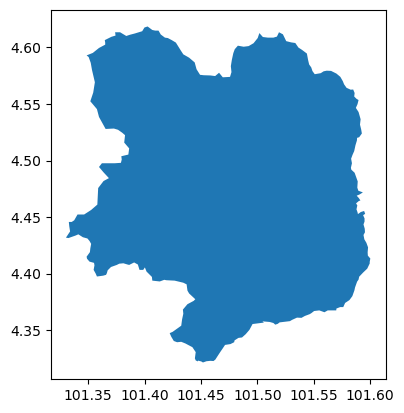

In [4]:
SA1 = gpd.read_file('Study_Area_1.shp')
SA1.plot()

<AxesSubplot: >

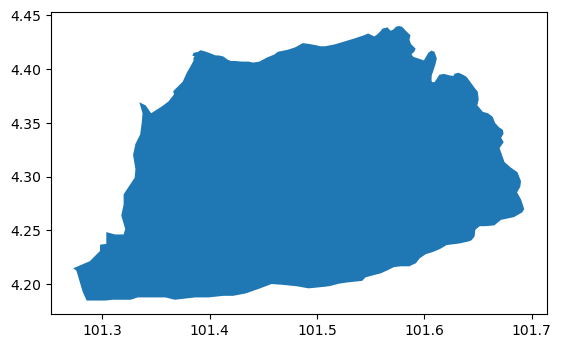

In [5]:
SA2 = gpd.read_file('Study_Area_2.shp')
SA2.plot() 

<AxesSubplot: >

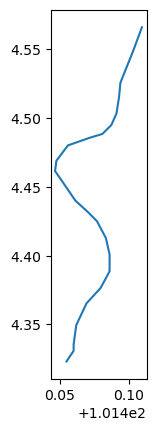

In [7]:
river = gpd.read_file('river.shp')
river.plot()

Plot multiple graphs

<AxesSubplot: >

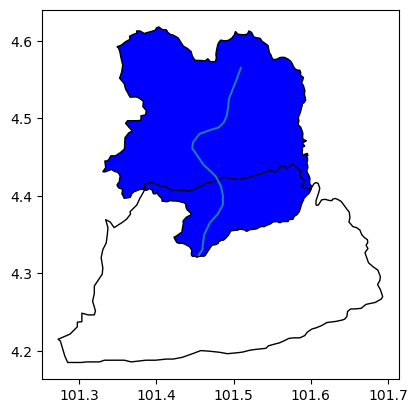

In [11]:
fig, ax = plt.subplots()
SA1.plot(ax = ax, color = 'blue', edgecolor = 'black')
SA2.plot(ax = ax, color = 'none', edgecolor = 'black')
river.plot(ax = ax)

Intersection

<AxesSubplot: >

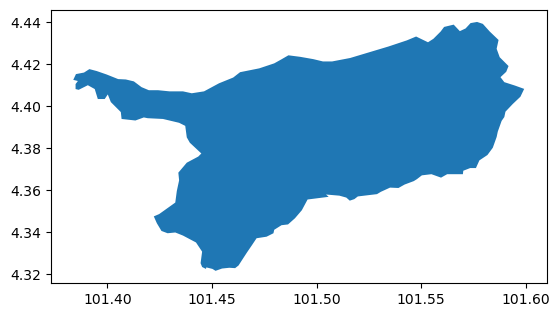

In [13]:
intersection = gpd.overlay(SA1, SA2, how = 'intersection')
intersection.plot()

Union

<AxesSubplot: >

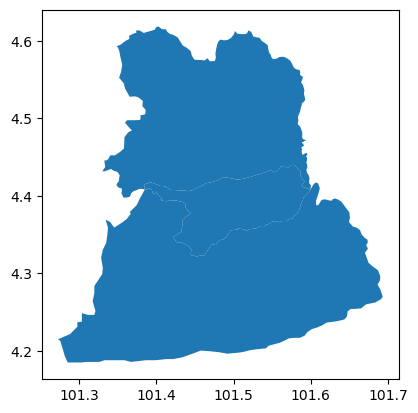

In [14]:
union = gpd.overlay(SA1, SA2, how = 'union')
union.plot()

Symmetric difference (Union - 2*Intersection)

<AxesSubplot: >

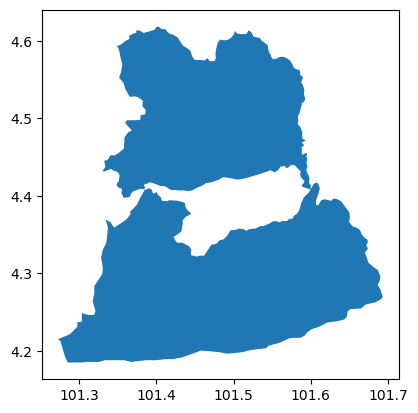

In [15]:
sd = gpd.overlay(SA1, SA2, how = 'symmetric_difference')
sd.plot()

Difference of polygons (SA1 - SA2) 

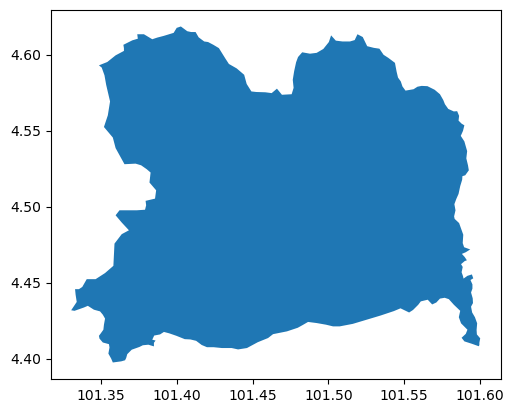

In [17]:
difference = gpd.overlay(SA1, SA2, how = 'difference')
difference.plot()
plt.show()

Dissolve (SA1 + SA2)

<AxesSubplot: >

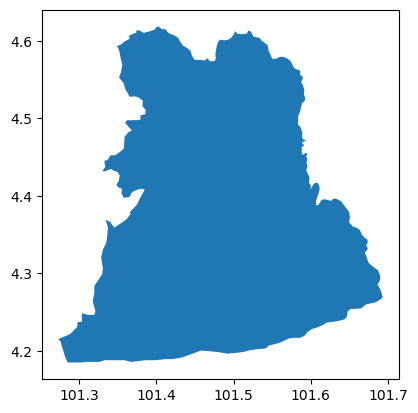

In [26]:
union = gpd.overlay(SA1, SA2, how = 'union')
union['common'] = 1

dissolved_sa = union.dissolve(by = 'common')
dissolved_sa.plot()

Reprojecting river Geopandas GeoDataFrame into a projected CRS

In [40]:
river_projected = river.to_crs(epsg=24547)
print(river, river_projected, type(river_projected))

   id                                           geometry
0   1  LINESTRING (101.50991 4.56638, 101.50335 4.548...    id                                           geometry
0   1  LINESTRING (778620.752 505214.942, 777899.429 ... <class 'geopandas.geodataframe.GeoDataFrame'>


Buffer

<AxesSubplot: >

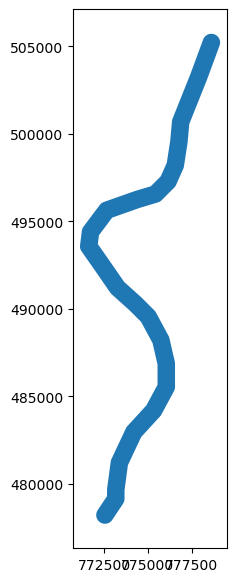

In [43]:
buffer_500 = river_projected['geometry'].buffer(distance = 500)
buffer_500.plot(figsize = (7,7))

Obtaining centroid

/var/folders/s5/fggs32ds2lv_whs2pymf3lq00000gn/T/ipykernel_44665/1975746138.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = union['geometry'].centroid


<AxesSubplot: >

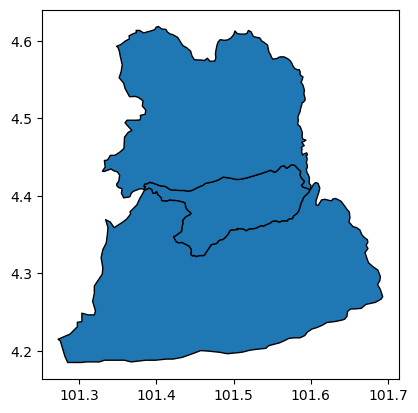

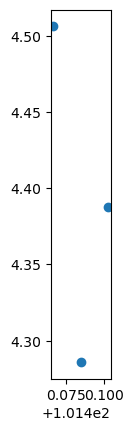

In [47]:
union = gpd.overlay(SA1, SA2, how = 'union')
union.plot(edgecolor = 'black')

centroid = union['geometry'].centroid
centroid.plot()

Plot both graph in one figure

<AxesSubplot: >

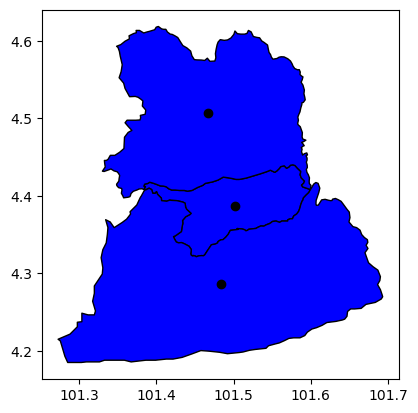

In [48]:
fig1, ax1 = plt.subplots()
union.plot(ax = ax1, color = 'blue', edgecolor = 'black')
centroid.plot(ax = ax1, color = 'black')
river.plot(ax = ax)

Airport Data

In [56]:
import pandas as pd
from shapely.geometry import Point

Import the states ESRI shp of the USA

<AxesSubplot: >

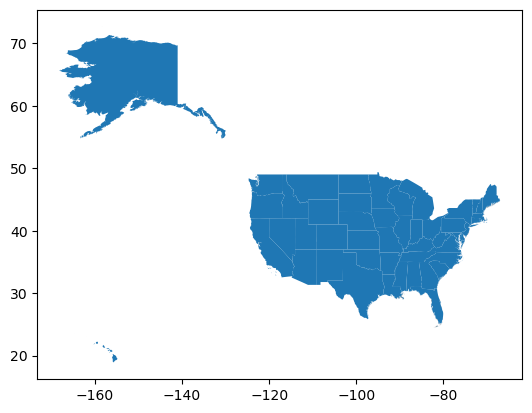

In [86]:
us_states = gpd.read_file('us_states.shp')
us_states.plot()

In [57]:
airport_data = pd.read_csv('us_airports.csv')

airport_data.columns

Index(['IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'], dtype='object')

In [59]:
geometry = [Point(xy) for xy in zip(airport_data['LONGITUDE'], airport_data['LATITUDE'])]

Plotting CSV file

<AxesSubplot: >

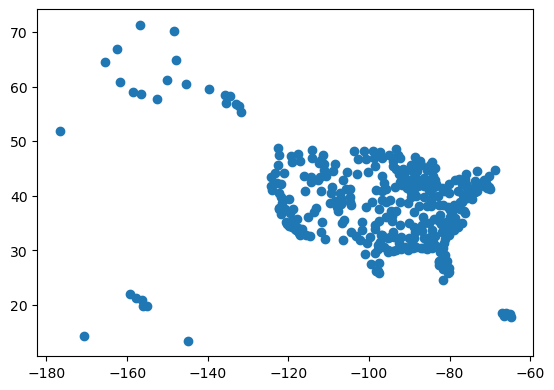

In [64]:
airport_us = gpd.GeoDataFrame(airport_data, geometry= geometry, crs = us_states.crs )
airport_us.plot()

Rename column name

In [72]:
airport_us.rename(columns= {'STATE':'state_code'}, inplace=True)
airport_us

,IATA,AIRPORT,CITY,state_code,COUNTRY,LATITUDE,LONGITUDE,geometry
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022)
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432)
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044)
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453)
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887)
...,...,...,...,...,...,...,...,...
335,WRG,Wrangell,Wrangell,AK,USA,56.484326,-132.369824,POINT (-132.36982 56.48433)
336,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638,POINT (-111.11764 44.68840)
337,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811,POINT (-94.30681 36.28187)
338,YAK,Yakutat,Yakutat,AK,USA,59.503361,-139.660226,POINT (-139.66023 59.50336)


In [73]:
us_states = pd.read_csv('state names and codes.csv')
us_states

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


Join Attributes

In [82]:
airport_us = airport_us.merge(us_states, on = 'state_code')


In [95]:
airport_us = airport_us[['AIRPORT', 'geometry']]
airport_us

,AIRPORT,geometry
0,Albuquerque International,POINT (-106.60919 35.04022)
1,Lea County Regional,POINT (-103.21703 32.68753)
2,Roswell Industrial Air Center,POINT (-104.53056 33.30156)
3,Santa Fe Municipal,POINT (-106.08814 35.61678)
4,Austin-Bergstrom International,POINT (-97.66987 30.19453)
...,...,...
150,Rock Springs-Sweetwater County,POINT (-109.06519 41.59422)
151,Yeager,POINT (-81.59319 38.37315)
152,Tri-State Walker-Long,POINT (-82.55803 38.36667)
153,Greenbrier Valley,POINT (-80.39947 37.85831)


<AxesSubplot: >

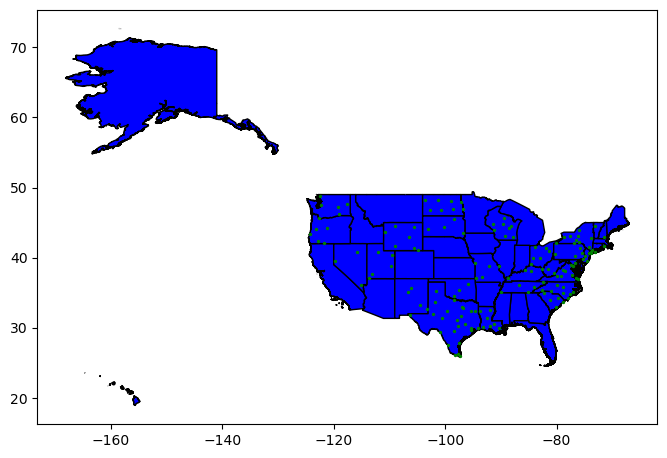

In [98]:
fig , ax = plt.subplots(figsize = (8,8))
us_states.plot(ax = ax, color ='blue', edgecolor= 'black')
airport_us.plot(ax = ax, markersize = 2, color= 'green')

Spatial Join

In [100]:
airport_us = gpd.sjoin(airport_us, us_states, how = 'inner', op= 'intersects')

/Users/azeem/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [101]:
airport_us

,AIRPORT,geometry,index_right,NAME_1
0,Albuquerque International,POINT (-106.60919 35.04022),31,New Mexico
1,Lea County Regional,POINT (-103.21703 32.68753),31,New Mexico
2,Roswell Industrial Air Center,POINT (-104.53056 33.30156),31,New Mexico
3,Santa Fe Municipal,POINT (-106.08814 35.61678),31,New Mexico
4,Austin-Bergstrom International,POINT (-97.66987 30.19453),43,Texas
...,...,...,...,...
150,Rock Springs-Sweetwater County,POINT (-109.06519 41.59422),50,Wyoming
151,Yeager,POINT (-81.59319 38.37315),48,West Virginia
152,Tri-State Walker-Long,POINT (-82.55803 38.36667),48,West Virginia
153,Greenbrier Valley,POINT (-80.39947 37.85831),48,West Virginia
